# Make Plots for Paper
This notebook repeats some analyses from the previous notebooks, but with greater emphasis on making a better model.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

## Load in the Reference Run
We are going to use the multi-objective run with the production runs

In [2]:
mo_traj = pd.read_csv(os.path.join('reference-runs', 'MO', 'molecules.csv'))

In [3]:
ic_traj = pd.read_csv(os.path.join('reference-runs', 'ic50', 'molecules.csv'))

## Plot the Search Performance
Show how well adding in the multi-objective works

In [4]:
for d in [mo_traj, ic_traj]:
    d['unique'] = False
    d.loc[d.drop_duplicates('smiles', keep='first').index, 'unique'] = True

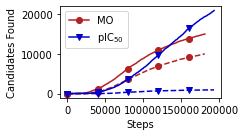

In [5]:
fig, ax = plt.subplots(figsize=(3.5, 2))

for d, c, m, l in zip([mo_traj, ic_traj], ['firebrick', 'mediumblue'], 
                      ['o', 'v'], ['MO', 'pIC$_{50}$']):
    ax.plot(np.logical_and(d['ic50'] > 8, d['unique']).cumsum(), f'-{m}',
           color=c, markevery=40000, label=l)
    ax.plot(((d['ic50'] > 8) & (d['QED'] > 0.5) & mo_traj['unique']).cumsum(), '--o',
            marker=m, color=c, markevery=40000)    
    
ax.legend()

ax.set_xlabel('Steps')
ax.set_ylabel('Candidates Found')
fig.tight_layout()
fig.savefig(os.path.join('figures', 'rl_trajectory.png'), dpi=320)
fig.savefig(os.path.join('figures', 'rl_trajectory.pdf'))

Print the fraction of "top" molecules with good QED

In [6]:
for d, l in zip([mo_traj, ic_traj], ['MO', 'pIC$_{50}$']):
    n_top = np.logical_and(d['ic50'] > 8, d['unique']).sum()
    n_top_qed = ((d['ic50'] > 8) & (d['QED'] > 0.5) & mo_traj['unique']).sum()
    print(f'{l} model. {n_top} with pIC50 > 8.'
          f' {n_top_qed} ({n_top_qed / n_top * 100: .2f}%) of those with QED > 0.5')

MO model. 14953 with pIC50 > 8. 9954 ( 66.57%) of those with QED > 0.5
pIC$_{50}$ model. 20850 with pIC50 > 8. 938 ( 4.50%) of those with QED > 0.5
